<a href="https://colab.research.google.com/github/sahilbaishya/HandsOnML/blob/main/Training_Deep_Neural_Networks_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Xavier Garlot and He Initialization

In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

# Nonsaturating Activation Functions

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [ ]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

## Neural Network on Fashion MNIST with Leaky Relu

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [ ]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 4ms/step - loss: 1.2828 - accuracy: 0.6074 - val_loss: 0.8695 - val_accuracy: 0.7246
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7816 - accuracy: 0.7472 - val_loss: 0.7014 - val_accuracy: 0.7788
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6702 - accuracy: 0.7831 - val_loss: 0.6357 - val_accuracy: 0.7948
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6123 - accuracy: 0.8002 - val_loss: 0.5830 - val_accuracy: 0.8136
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5752 - accuracy: 0.8105 - val_loss: 0.5525 - val_accuracy: 0.8228
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5489 - accuracy: 0.8163 - val_loss: 0.5301 - val_accuracy: 0.8272
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5291 - accuracy: 0.8218 - val_loss: 0.5119 - val_accuracy

## Using PReLU

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, kernel_initializer = 'he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer = 'he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation= 'softmax')

])

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3677 - accuracy: 0.5896 - val_loss: 0.8986 - val_accuracy: 0.7308
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8025 - accuracy: 0.7512 - val_loss: 0.7078 - val_accuracy: 0.7834
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6807 - accuracy: 0.7858 - val_loss: 0.6367 - val_accuracy: 0.7992
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6180 - accuracy: 0.8035 - val_loss: 0.5799 - val_accuracy: 0.8188
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5775 - accuracy: 0.8122 - val_loss: 0.5469 - val_accuracy: 0.8296
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5486 - accuracy: 0.8204 - val_loss: 0.5236 - val_accuracy: 0.8338
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5267 - accuracy: 0.8255 - val_loss: 0.5038 - val_accuracy:

## Using SELU

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation = 'selu', kernel_initializer = 'lecun_normal'))
for i in range (99):
  model.add(tf.keras.layers.Dense(100, activation = 'selu', kernel_initializer = 'lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 10, validation_data = (X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 54s 23ms/step - loss: 1.1282 - accuracy: 0.5762 - val_loss: 0.7678 - val_accuracy: 0.7190
Epoch 2/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.7211 - accuracy: 0.7327 - val_loss: 0.7078 - val_accuracy: 0.7582
Epoch 3/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.6318 - accuracy: 0.7691 - val_loss: 0.5926 - val_accuracy: 0.7856
Epoch 4/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.6443 - accuracy: 0.7704 - val_loss: 0.6406 - val_accuracy: 0.7824
Epoch 5/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.5649 - accuracy: 0.7994 - val_loss: 0.5197 - val_accuracy: 0.8228
Epoch 6/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4980 - accuracy: 0.8280 - val_loss: 0.5382 - val_accuracy: 0.8028
Epoch 7/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.4777 - accuracy: 0.8351 - val_loss: 0.4508 -

## Using ReLU

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
model.add(tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer='he_normal'))
for i in range (99):
  model.add(tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 10, validation_data = (X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 56s 25ms/step - loss: 1.9071 - accuracy: 0.2700 - val_loss: 1.4582 - val_accuracy: 0.4296
Epoch 2/10
1719/1719 [==============================] - 41s 24ms/step - loss: 1.2752 - accuracy: 0.4612 - val_loss: 0.9763 - val_accuracy: 0.6244
Epoch 3/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.9463 - accuracy: 0.6170 - val_loss: 0.8247 - val_accuracy: 0.6808
Epoch 4/10
1719/1719 [==============================] - 39s 23ms/step - loss: 0.7916 - accuracy: 0.6798 - val_loss: 0.8840 - val_accuracy: 0.6512
Epoch 5/10
1719/1719 [==============================] - 39s 23ms/step - loss: 0.7049 - accuracy: 0.7097 - val_loss: 0.6747 - val_accuracy: 0.7196
Epoch 6/10
1719/1719 [==============================] - 39s 23ms/step - loss: 0.6526 - accuracy: 0.7323 - val_loss: 0.6387 - val_accuracy: 0.7476
Epoch 7/10
1719/1719 [==============================] - 39s 23ms/step - loss: 0.6295 - accuracy: 0.7477 - val_loss: 0.6002 -

# Batch Normalization

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [ ]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_208 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_209 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8425 - accuracy: 0.7189 - val_loss: 0.5427 - val_accuracy: 0.8190
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5653 - accuracy: 0.8036 - val_loss: 0.4616 - val_accuracy: 0.8466
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5111 - accuracy: 0.8221 - val_loss: 0.4283 - val_accuracy: 0.8598
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4735 - accuracy: 0.8339 - val_loss: 0.4089 - val_accuracy: 0.8630
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4510 - accuracy: 0.8420 - val_loss: 0.3938 - val_accuracy: 0.8700
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4345 - accuracy: 0.8466 - val_loss: 0.3835 - val_accuracy: 0.8740
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4205 - accuracy: 0.8522 - val_loss: 0.3734 - val_accuracy

## Applying Batch Normalization Before Activation

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0224 - accuracy: 0.6838 - val_loss: 0.6719 - val_accuracy: 0.7854
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6726 - accuracy: 0.7823 - val_loss: 0.5563 - val_accuracy: 0.8160
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5942 - accuracy: 0.8028 - val_loss: 0.5036 - val_accuracy: 0.8314
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5459 - accuracy: 0.8175 - val_loss: 0.4711 - val_accuracy: 0.8366
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5126 - accuracy: 0.8258 - val_loss: 0.4492 - val_accuracy: 0.8432
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4910 - accuracy: 0.8310 - val_loss: 0.4314 - val_accuracy: 0.8480
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4740 - accuracy: 0.8373 - val_loss: 0.4181 - val_accuracy:

# Gradient Clipping

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape

(43986, 28, 28)

In [ ]:
X_train_B.shape

(200, 28, 28)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.6152 - accuracy: 0.7943 - val_loss: 0.3984 - val_accuracy: 0.8582
Epoch 2/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3658 - accuracy: 0.8756 - val_loss: 0.3298 - val_accuracy: 0.8909
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3249 - accuracy: 0.8884 - val_loss: 0.2994 - val_accuracy: 0.9026
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3043 - accuracy: 0.8962 - val_loss: 0.2846 - val_accuracy: 0.9073
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2908 - accuracy: 0.9002 - val_loss: 0.2737 - val_accuracy: 0.9088
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2809 - accuracy: 0.9040 - val_loss: 0.2673 - val_accuracy: 0.9131
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2724 - accuracy: 0.9074 - val_loss: 0.2640 - val_accuracy:

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_220 (Dense)           (None, 300)               235500    
                                                                 
 dense_221 (Dense)           (None, 100)               30100     
                                                                 
 dense_222 (Dense)           (None, 50)                5050      
                                                                 
 dense_223 (Dense)           (None, 50)                2550      
                                                                 
 dense_224 (Dense)           (None, 50)                2550      
                                                                 
 dense_225 (Dense)           (None, 1)                

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 2s 158ms/step - loss: 0.7857 - accuracy: 0.5550 - val_loss: 0.6404 - val_accuracy: 0.6166
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6126 - accuracy: 0.6400 - val_loss: 0.5111 - val_accuracy: 0.7667
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.4899 - accuracy: 0.7750 - val_loss: 0.4268 - val_accuracy: 0.8631
Epoch 4/20
7/7 [==============================] - 0s 18ms/step - loss: 0.4073 - accuracy: 0.8400 - val_loss: 0.3648 - val_accuracy: 0.9067
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3455 - accuracy: 0.9000 - val_loss: 0.3141 - val_accuracy: 0.9412
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 0.2939 - accuracy: 0.9400 - val_loss: 0.2777 - val_accuracy: 0.9473
Epoch 7/20
7/7 [==============================] - 0s 31ms/step - loss: 0.2570 - accuracy: 0.9500 - val_loss: 0.2488 - val_accuracy: 0.9554
Epoch 8/20
7/7 [==========

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 42ms/step - loss: 0.5763 - accuracy: 0.6500 - val_loss: 0.5649 - val_accuracy: 0.6826
Epoch 2/4
7/7 [==============================] - 0s 18ms/step - loss: 0.5448 - accuracy: 0.6600 - val_loss: 0.5342 - val_accuracy: 0.7028
Epoch 3/4
7/7 [==============================] - 0s 17ms/step - loss: 0.5140 - accuracy: 0.6850 - val_loss: 0.5079 - val_accuracy: 0.7312
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.4877 - accuracy: 0.7150 - val_loss: 0.4831 - val_accuracy: 0.7596
Epoch 1/16
7/7 [==============================] - 1s 57ms/step - loss: 0.3905 - accuracy: 0.8050 - val_loss: 0.3121 - val_accuracy: 0.9067
Epoch 2/16
7/7 [==============================] - 0s 19ms/step - loss: 0.2632 - accuracy: 0.9350 - val_loss: 0.2428 - val_accuracy: 0.9381
Epoch 3/16
7/7 [==============================] - 0s 31ms/step - loss: 0.2064 - accuracy: 0.9650 - val_loss: 0.2043 - val_accuracy: 0.9574
Epoch 4/16
7/7 [===============

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9800


[0.11188411712646484, 0.9800000190734863]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 5ms/step - loss: 0.0811 - accuracy: 0.9825


[0.08106134086847305, 0.9825000166893005]

In [ ]:
(100 - 98)/(100 - 98.25)

1.1428571428571428

# Faster Optimizers

## Momentum Optimization

In [2]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3, momentum = 0.9)

## Nesterov Optimization

In [4]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3, momentum = 0.9, nesterov = True)

## Adagrad

In [5]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 1e-3)

## RMSProp

In [8]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3, rho = 0.9)

## Adam

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3, beta_1 = 0.9, beta_2 = 0.999)

## Adamax

In [10]:
optimizer = tf.keras.optimizers.Adamax(learning_rate = 1e-3, beta_1 = 0.9, beta_2 = 0.999 )

## Nadam

In [11]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 1e-3, beta_1=0.9, beta_2 = 0.999)

## Learning Rate Scheduling

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [14]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

### Power Scheduling

In [25]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps = 10000,
    decay_rate=1e-4,
    )
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [27]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4955 - accuracy: 0.8285 - val_loss: 0.4242 - val_accuracy: 0.8558
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4061 - accuracy: 0.8585 - val_loss: 0.4098 - val_accuracy: 0.8596
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3963 - accuracy: 0.8619 - val_loss: 0.4080 - val_accuracy: 0.8618
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3943 - accuracy: 0.8625 - val_loss: 0.4077 - val_accuracy: 0.8610
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8628 - val_loss: 0.4076 - val_accuracy: 0.8610
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3937 - accuracy: 0.8627 - val_loss: 0.4076 - val_accuracy: 0.8610
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3937 - accuracy: 0.8628 - val_loss: 0.4076 - val_accuracy:

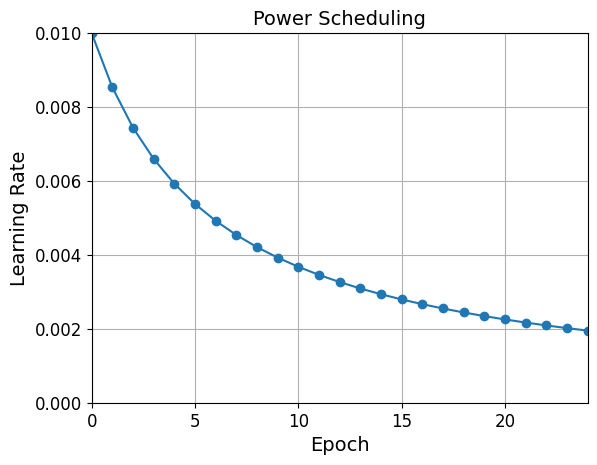

In [28]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

In [29]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [30]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [32]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7526 - accuracy: 0.7767 - val_loss: 0.9397 - val_accuracy: 0.7448 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6687 - accuracy: 0.7995 - val_loss: 0.7551 - val_accuracy: 0.8006 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6560 - accuracy: 0.8061 - val_loss: 0.7105 - val_accuracy: 0.7798 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5938 - accuracy: 0.8240 - val_loss: 0.7089 - val_accuracy: 0.8192 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5759 - accuracy: 0.8285 - val_loss: 0.6017 - val_accuracy: 0.8208 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5145 - accuracy: 0.8446 - val_loss: 0.6723 - val_accuracy: 0.8114 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 6

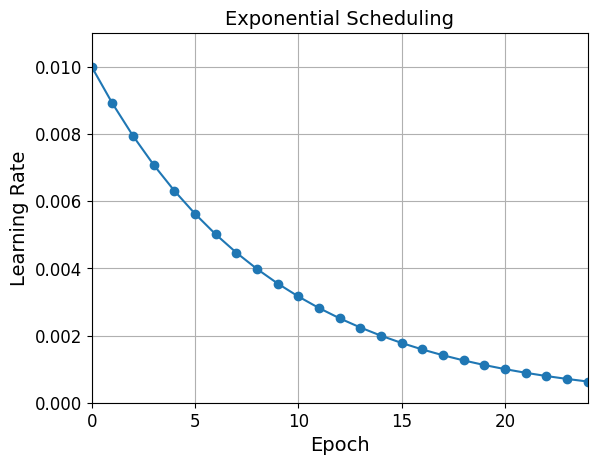

In [33]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

To update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [34]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7136 - accuracy: 0.7872 - val_loss: 0.6422 - val_accuracy: 0.8154 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6084 - accuracy: 0.8101 - val_loss: 0.5655 - val_accuracy: 0.8198 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5697 - accuracy: 0.8231 - val_loss: 0.5954 - val_accuracy: 0.8418 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5238 - accuracy: 0.8367 - val_loss: 0.5305 - val_accuracy: 0.8394 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4730 - accuracy: 0.8502 - val_loss: 0.5269 - val_accuracy: 0.8530 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4408 - accuracy: 0.8623 - val_loss: 0.4785 - val_accuracy: 0.8588 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8

In [35]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

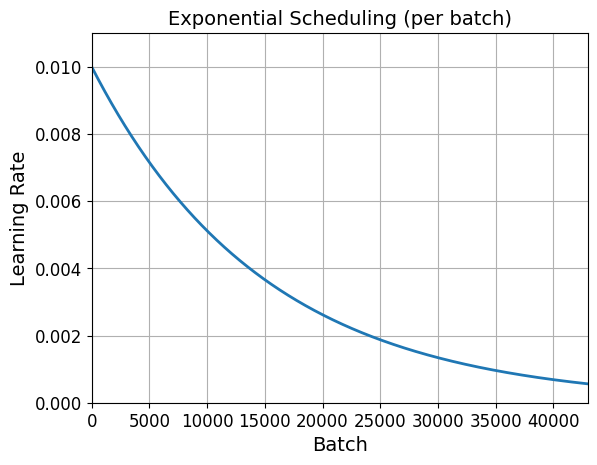

In [36]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### PieceWise Constant Scheduling

In [37]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [38]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [39]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7512 - accuracy: 0.7744 - val_loss: 0.8281 - val_accuracy: 0.7922 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7457 - accuracy: 0.7839 - val_loss: 0.9815 - val_accuracy: 0.7924 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8200 - accuracy: 0.7661 - val_loss: 1.0114 - val_accuracy: 0.7414 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8393 - accuracy: 0.7592 - val_loss: 0.9487 - val_accuracy: 0.7194 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8100 - accuracy: 0.7486 - val_loss: 0.8075 - val_accuracy: 0.7028 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5330 - accuracy: 0.8277 - val_loss: 0.6611 - val_accuracy: 0.7930 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 6s

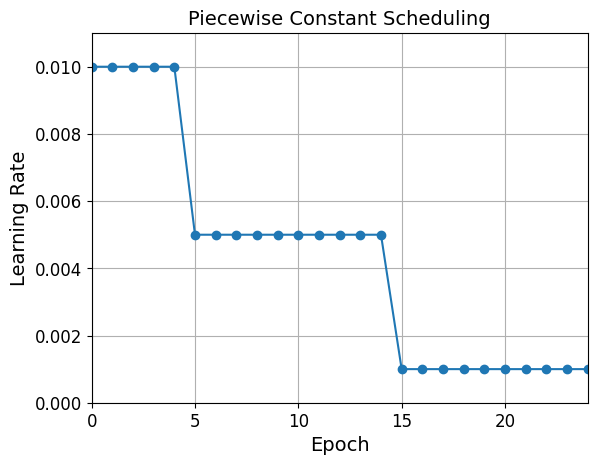

In [40]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [41]:
tf.random.set_seed(42)
np.random.seed(42)

In [42]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5913 - accuracy: 0.8065 - val_loss: 0.4983 - val_accuracy: 0.8440 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4911 - accuracy: 0.8417 - val_loss: 0.5913 - val_accuracy: 0.8328 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5298 - accuracy: 0.8392 - val_loss: 0.5139 - val_accuracy: 0.8486 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5256 - accuracy: 0.8458 - val_loss: 0.4844 - val_accuracy: 0.8560 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5409 - accuracy: 0.8455 - val_loss: 0.4717 - val_accuracy: 0.8564 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4981 - accuracy: 0.8538 - val_loss: 0.6352 - val_accuracy: 0.8584 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 7s

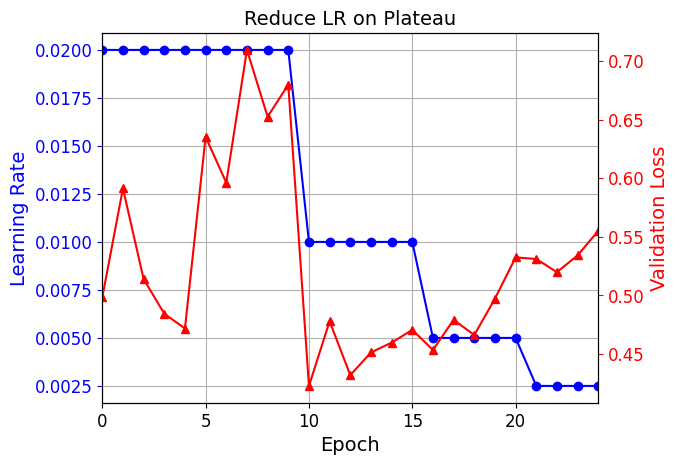

In [43]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras.Schedulers

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4886 - accuracy: 0.8281 - val_loss: 0.4015 - val_accuracy: 0.8606
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3786 - accuracy: 0.8671 - val_loss: 0.3710 - val_accuracy: 0.8706
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3443 - accuracy: 0.8773 - val_loss: 0.3752 - val_accuracy: 0.8652
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3219 - accuracy: 0.8852 - val_loss: 0.3497 - val_accuracy: 0.8764
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3061 - accuracy: 0.8904 - val_loss: 0.3420 - val_accuracy: 0.8772
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2914 - accuracy: 0.8962 - val_loss: 0.3424 - val_accuracy: 0.8788
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.8998 - val_loss: 0.3367 - val_accuracy:

### ICycle Scheduling

In [59]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [55]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

In [56]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [57]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [60]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

430/430 [==============================] - 2s 5ms/step - loss: 1.9979 - accuracy: 0.3340


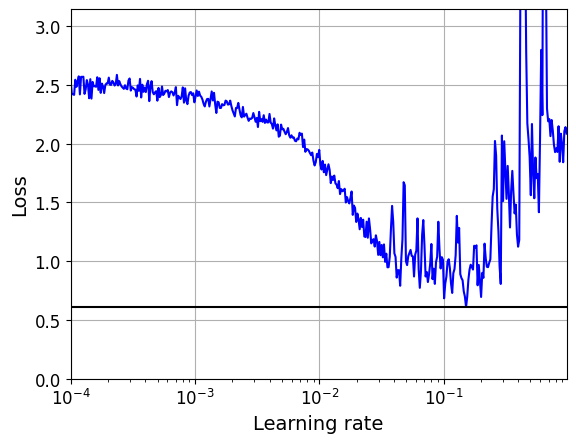

In [62]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [63]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [64]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 3s 5ms/step - loss: 0.9702 - accuracy: 0.6934 - val_loss: 0.6127 - val_accuracy: 0.7962
Epoch 2/25
430/430 [==============================] - 2s 4ms/step - loss: 0.5768 - accuracy: 0.7992 - val_loss: 0.4870 - val_accuracy: 0.8364
Epoch 3/25
430/430 [==============================] - 2s 4ms/step - loss: 0.5036 - accuracy: 0.8221 - val_loss: 0.4827 - val_accuracy: 0.8236
Epoch 4/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4582 - accuracy: 0.8359 - val_loss: 0.4295 - val_accuracy: 0.8440
Epoch 5/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4320 - accuracy: 0.8447 - val_loss: 0.4334 - val_accuracy: 0.8420
Epoch 6/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4036 - accuracy: 0.8538 - val_loss: 0.3837 - val_accuracy: 0.8652
Epoch 7/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3859 - accuracy: 0.8601 - val_loss: 0.3777 - val_accuracy: 0.8650
Epoch 

# Regularization